# Case Study with mixed signals
## This case study attempts to separate two mixed signals into their original form

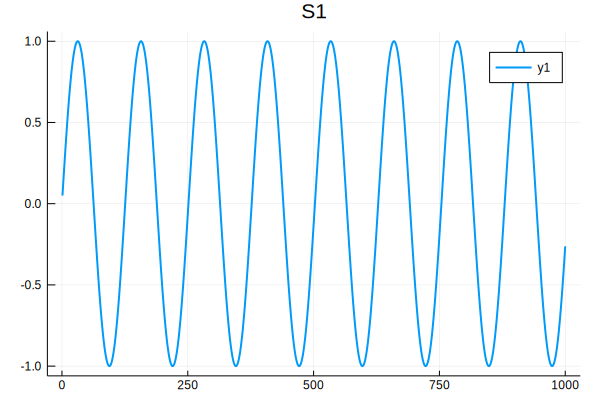

In [1]:
#using Pkg
#Pkg.add("Plots")
using Plots

s1 = sin.((1:1000)./20)
plot(s1, linewidth=2, title = "S1")

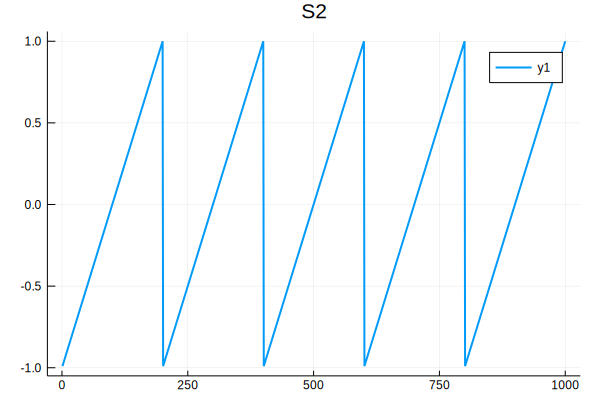

In [2]:
s2 = vec(repeat(((1:200).-100)/100, 5))
plot(s2,linewidth=2,title="S2")

## Mixing the previous functions twice using different factors so we have enough data to apply the algorithm

In [3]:
#mixing matrix
A = [0.291 -0.5439 ; 0.6557 0.5572]
S = hcat(s1,s2)
X = S * A

1000×2 Array{Float64,2}:
 -0.634599  -0.578812
 -0.613534  -0.600355
 -0.592543  -0.621763
 -0.571659  -0.642968
 -0.55092   -0.663903
 -0.530362  -0.684501
 -0.510018  -0.704698
 -0.489923  -0.724429
 -0.470112  -0.74363 
 -0.450617  -0.76224 
 -0.431471  -0.780198
 -0.412705  -0.797445
 -0.39435   -0.813925
  ⋮                  
  0.371709   0.891898
  0.3885     0.87834 
  0.405796   0.86384 
  0.423569   0.848449
  0.441791   0.832218
  0.460433   0.815202
  0.479465   0.797458
  0.498855   0.779044
  0.518572   0.760019
  0.538583   0.740446
  0.558853   0.720387
  0.579349   0.699906

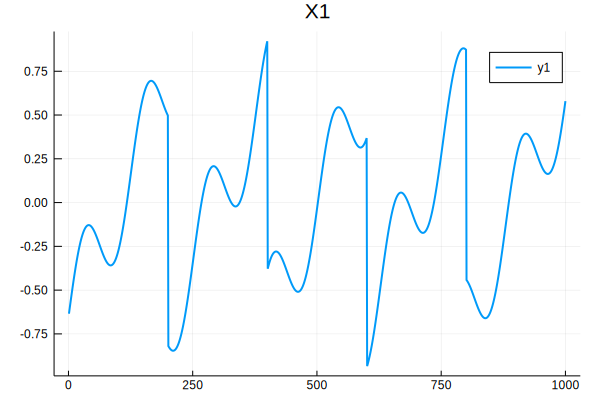

In [4]:
plot(X[:,1], linewidth=2, title = "X1")

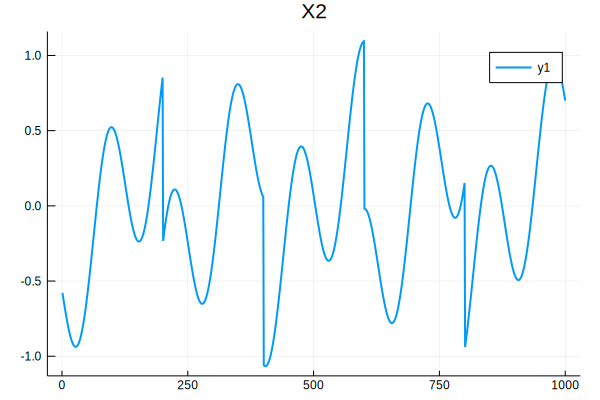

In [5]:
plot(X[:,2], linewidth=2, title = "X2")

## Data whitening, application of the FICA algorithm

In [32]:
include("fastICA.jl")
X1 = fastICA.whiten(X,false)
J = fastICA.fast_ica(200,2,Array(X1'),0.0001,1.,false)
W = J * X'

wp = [0.375881, 0.624119]
w1 = [-0.516469, -0.856306]
W for iter 1 = [0.375881 0.624119; 0.979178 0.624774]
Change for iter 1 = 0.2714323321478952
wp = [-0.516469, -0.856306]
w1 = [0.51702, 0.855973]
W for iter 2 = [0.375881 0.624119; 0.979178 0.624774]
Change for iter 2 = 2.0708477521669266e-7
wp = [-0.0993864, -0.785724]
w1 = [-0.901386, -0.433016]
W for iter 1 = [0.375881 0.624119; 0.610479 0.389521]
Change for iter 1 = 0.5701833070172759
wp = [-0.901386, -0.433016]
w1 = [-0.0394839, -0.99922]
W for iter 2 = [0.375881 0.624119; 0.610479 0.389521]
Change for iter 2 = 0.5317314040282897
wp = [-0.0394839, -0.99922]
w1 = [-0.953432, -0.301608]
W for iter 3 = [0.375881 0.624119; 0.610479 0.389521]
Change for iter 3 = 0.660981562501751
wp = [-0.953432, -0.301608]
w1 = [0.0539727, -0.998542]
W for iter 4 = [0.375881 0.624119; 0.610479 0.389521]
Change for iter 4 = 0.7502904608650497
wp = [0.0539727, -0.998542]
w1 = [-0.98855, -0.150895]
W for iter 5 = [0.375881 0.624119; 0.610479 0.389521]

2×1000 Array{Float64,2}:
 -0.823548   -0.831098    -0.838569   …   0.91226    0.90557    0.898636
 -0.0335881  -0.00345788   0.0265247     -0.148911  -0.120395  -0.091421

## Plotting of results

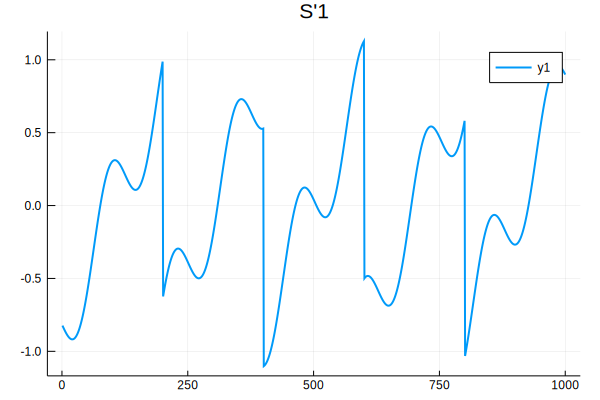

In [33]:
plot(W[1,:,],linewidth=2, title = "S'1")

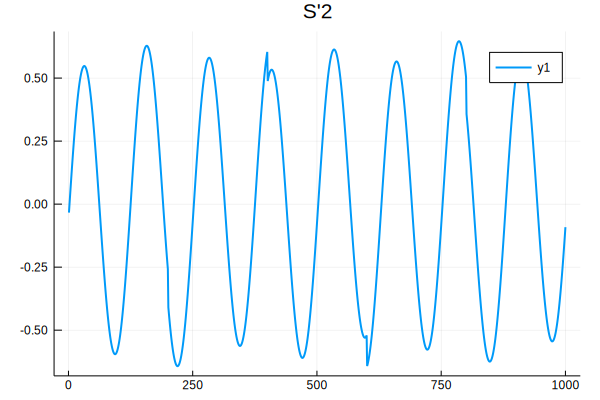

In [34]:
plot(W[2,:,],linewidth=2, title = "S'2")